In [2]:
using Plots
using MLDatasets

In [43]:
function encode16(x)
    e = zeros(Float32,7,7);
    for x_offset ∈ 0:6, y_offset ∈ 0:6
        x_ind = (4*x_offset+1):(4*x_offset+4)
        y_ind = (4*y_offset+1):(4*y_offset+4)
        block = x[x_ind,y_ind,1] .>=0.5
        e[x_offset+1,y_offset+1] = Float32.((Int32.(block.chunks[1]) .- 32768)./32768)
    end
    e
end;

function decode16(e)
    e
end;

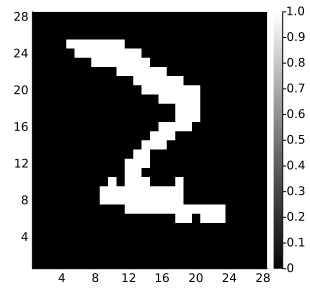

In [42]:
xtrain, ytrain = MLDatasets.MNIST(:train)[:];
heatmap(xtrain[:,:,1]' .>= 0.5, c = :greys, size=(310,300), xticks=(0:4:28), yticks=(0:4:28))

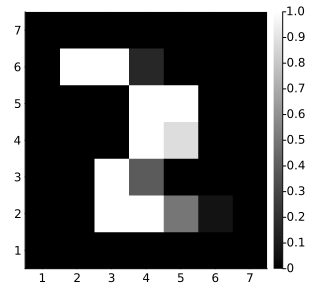

In [31]:
e = zeros(Float32,7,7);
for x_offset ∈ 0:6, y_offset ∈ 0:6
    x_ind = (4*x_offset+1):(4*x_offset+4)
    y_ind = (4*y_offset+1):(4*y_offset+4)
    block = xtrain[x_ind,y_ind,1] .>=0.5
    e[x_offset+1,y_offset+1] = Float32.((Int32.(block.chunks[1]) .- 32768)./32768)
end
heatmap(e' .+ 1, c = :greys, clims=(0,1), size=(310,300))

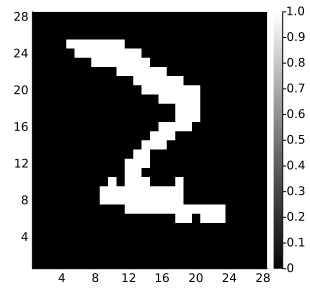

In [39]:
x̂ = BitMatrix(undef,28,28)
i_block = 1;
for y_offset ∈ 0:6, x_offset ∈ 0:6
    x_ind = (4*x_offset+1):(4*x_offset+4)
    y_ind = (4*y_offset+1):(4*y_offset+4)
    d = UInt16(32768*e[i_block] + 32768)
    x̂[x_ind,y_ind] = BitArray(reshape(digits(UInt8, d,base=2,pad=16),4,4))
    i_block+=1;
end
heatmap(x̂', c =:greys, size=(310,300), xticks=(0:4:28), yticks=(0:4:28))